<a href="https://colab.research.google.com/github/lauraosede/Churn-Predicition/blob/main/churn_prediction_on_telecoms_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  General Information about this project

Telecommunication companies play a substantial role in connecting individuals all over the world. Its usefulness has created saturation in the field, making it difficult for many service providers to persist. In a market where options are bountiful, the churn rate is high, and purchase propensity is low. To survive annihilation, telecom companies need to identify factors that play a role in high churn rates and attack those factors. 

This project will test different machine learning models to select the best one that identifies features that highly influence the churn rate. 

The dataset for this project is from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

Dataset can be found here: https://www.kaggle.com/radmirzosimov/telecom-users-dataset




## Information about our data



**The telecoms_users.csv contains the following columns:**


* customerID - customer id
* gender - customer gender (male / female)
* SeniorCitizen - whether the customer is a pensioner (1, 0)
* Partner - whether the customer is married (Yes, No)
* Dependents - whether the customer has dependents or not (Yes, No)
* tenure - how many months a person has been a customer of the company
* PhoneService - is the telephone service activated (Yes, No)
* MultipleLines - whether multiple telephone lines are connected (Yes, No, No phone service)
* InternetService - customer's Internet provider (DSL, Fiber optic, No)
* OnlineSecurity - is the online security service enabled (Yes, No, No internet service)
* OnlineBackup - is the online backup service activated (Yes, No, No internet service)
* DeviceProtection - does the customer have equipment insurance (Yes, No, No internet service)
* TechSupport - is the technical support service activated (Yes, No, No internet service)
* StreamingTV - is the streaming TV service activated (Yes, No, No internet service)
* StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
* Contract - type of customer contract (Month-to-month, One year, Two year)
* PaperlessBilling - whether the client uses paperless billing (Yes, No)
* PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - current monthly payment
* TotalCharges - the total amount that the client has paid for the services for the entire time
* Churn - whether there was a churn (Yes or No)




# Part One:  Churn prediction 

## 1. Data Import 

In [ ]:
#imports
#standard imports
import pandas as pd
import numpy as np

#imports for data visulization
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/telecom_users.csv')


In [ ]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


## 2. Data Summary

#### **Descriptive statistics**

In [ ]:
df.shape

(5986, 22)

**Our dataset is made up of 5986 rows and 22 features. lets find how many unique customer input we have**

In [ ]:
len(df['customerID'].unique())

5986

**Output is 5986, this shows that all the customer input in our data are from different customers.
Thats good, now we need to find out if there are any missing values in our dataset**

In [ ]:
#looking through the data for more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


*   It seems like there are no missing values in our dataset, but just to be safe, we are going to strip off leading and trailing spaces in all the columns in our dataset and search again.
*  We have 18 categorical data types which we will have to vectorize.
* SeniorCitizen shows an int datatype, but it is actually has binary features.
*  Our 'TotalCharges' column has an object dtype. We need to convert it to numeric to help our machine learning model effectively use it.

In [ ]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [ ]:
#looking through the dataset again to see if there are any missing values
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#convert object type to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

**Now, lets drop the 'Unnamed: 0' and ' customerID' column as they provides no real value or insight into our data.**

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['customerID'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


#### **Data vizualization**

We will divide this section into three:
*   Categorical features visualization
*   Continous features visualization 
*   Target features vizualization 

##### **Categorical features**

Lets get a closer look at the categorical features in our dataset. We want to find out how many unique values are in columns with object datatype.

In [ ]:

col = df[['gender', 'InternetService','Partner', 'Dependents', 'PhoneService', 'MultipleLines',
          'OnlineSecurity',   'OnlineBackup' , 'DeviceProtection', 'TechSupport',
          'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
for cols in col:
    print(cols + ':   ' + df[cols].unique())

['gender:   Male' 'gender:   Female']
['InternetService:   No' 'InternetService:   Fiber optic'
 'InternetService:   DSL']
['Partner:   Yes' 'Partner:   No']
['Dependents:   Yes' 'Dependents:   No']
['PhoneService:   Yes' 'PhoneService:   No']
['MultipleLines:   Yes' 'MultipleLines:   No'
 'MultipleLines:   No phone service']
['OnlineSecurity:   No internet service' 'OnlineSecurity:   No'
 'OnlineSecurity:   Yes']
['OnlineBackup:   No internet service' 'OnlineBackup:   Yes'
 'OnlineBackup:   No']
['DeviceProtection:   No internet service' 'DeviceProtection:   Yes'
 'DeviceProtection:   No']
['TechSupport:   No internet service' 'TechSupport:   No'
 'TechSupport:   Yes']
['StreamingTV:   No internet service' 'StreamingTV:   Yes'
 'StreamingTV:   No']
['StreamingMovies:   No internet service' 'StreamingMovies:   No'
 'StreamingMovies:   Yes']
['Contract:   Two year' 'Contract:   Month-to-month'
 'Contract:   One year']
['PaperlessBilling:   No' 'PaperlessBilling:   Yes']
['PaymentMethod:

Our categorical columns are made up of a mix of binary categorical features and multiple categorical features. Lets see a count plot visualization of our categorical columns.

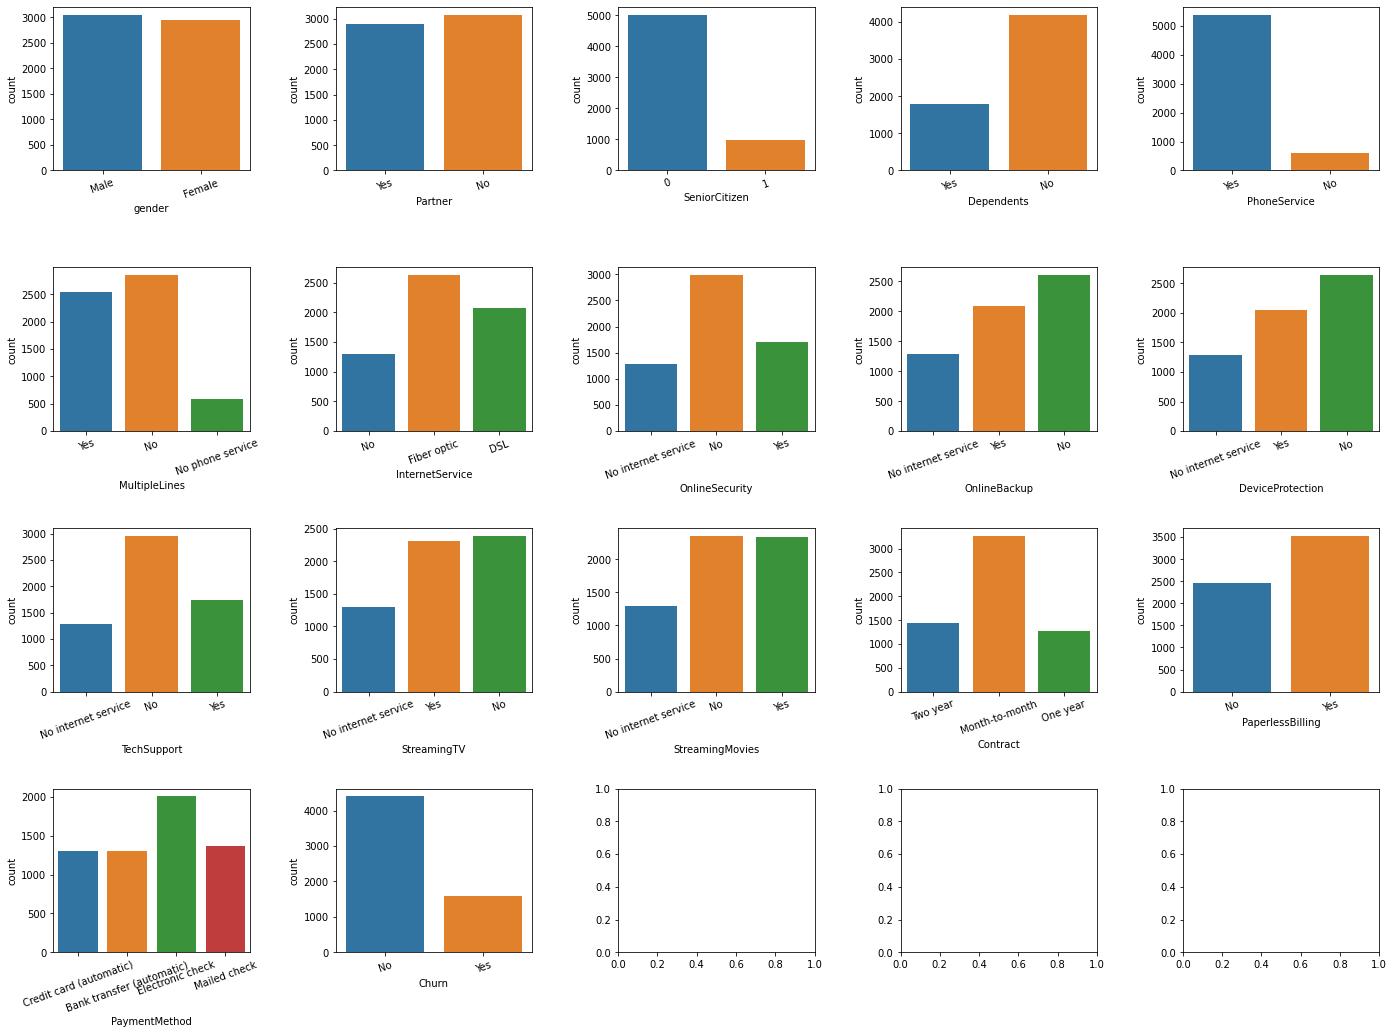

In [ ]:
categorical_features =  ['gender',  'Partner', 'SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines',
         'InternetService', 'OnlineSecurity',   'OnlineBackup' , 'DeviceProtection', 'TechSupport',
          'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

fig, ax = plt.subplots(4,5, figsize=(20, 15))
for variable, subplot in zip(categorical_features, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)
        fig.tight_layout(pad=3.0)
        
        

**Information gathered**
* It is obvious that there is a high imbalance in our Dependets, phoneService, SeniorCitizen binary features.
* There is also a high imbalance in majority of our multiple feature categorical columns. 
* Our gender and Partner features are however balanced. 
* There is a significant difference between customers who use fiber optics, DSL and no internet service. 
* Majority of the company's customers have no dependents on their phone plan.
* There is a significant gap between customers who use the phone service provided by the company and customers who don't.
* Majority of the customers also pay through electronic check, but payment methods through other forms are almost similar. 
* The most popular plan is the month-to-month plan. 
* There is also a large inbalance in our target column (Churn).


##### **Continous features**

Lets look through our dataset to see what continous features we have

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5976.000000
mean,0.161377,32.468760,64.802213,2298.060617
std,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,404.312500
50%,0.000000,29.000000,70.400000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


'df.describe()' only shows numeric values. From the function, the continous features seem to be SeniorCitizen', 'tenure', 'MonthlyCharges and 'TotalCharges'. However, SeniorCitizen' is really a binary of 1s and 0s. The TotalCharges columns holds the value of 'tenure' column multiplied by 'MonthlyCharges'. So, we won't be including this feature to reduce model complexity. lets plot a distribution plot for our continous features.



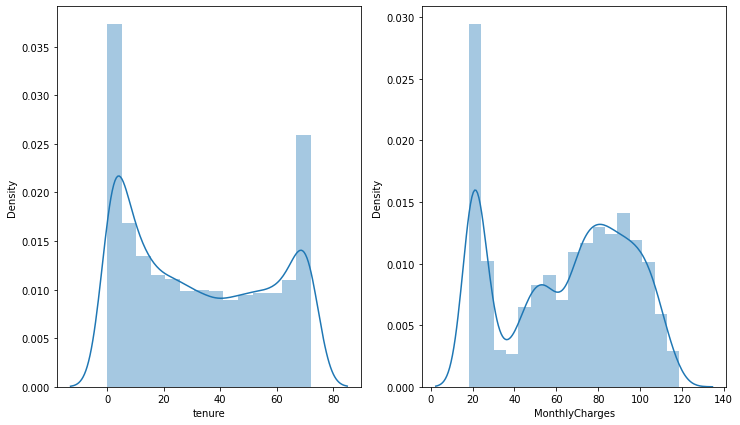

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))

sns.set_color_codes()
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])


Information from the density plot
According to the distribution of tenure variable, most of the customers are 

*   In respect to tenure features, a density of over 0.035 of the customers are new. With a lower percentage of older customers.
*   In respect to the MonthlyCharges feature, a high density of about 0.028 customers are on a lower monthly charge rate.


##### **Target feature**

Let's further analyse the Churn column.

In [ ]:
print(df['Churn'].value_counts())
print('\nTotal Churn Rate: {:.2%}'.format(df[df['Churn'] == 'Yes'].shape[0] / df.shape[0]))


No     4399
Yes    1587
Name: Churn, dtype: int64

Total Churn Rate: 26.51%


As we saw from our count plot earlier, our Churn features are heavily imbalanced at a 26.51%. To further visualize this, we will plot a pie chart.

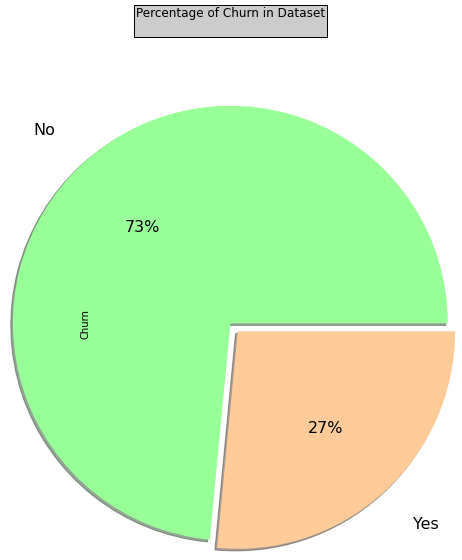

In [ ]:
churn = df['Churn'].value_counts(sort = True)
colors = ['#99ff99','#ffcc99'] 
plt.figure(figsize=(7, 5))
explode = (0, 0.1)

plot = churn.plot.pie(fontsize=16, colors=colors, explode=explode, autopct='%1.0f%%',shadow=True, 
                      labeldistance=1.2, radius=2)
plt.title('Percentage of Churn in Dataset\n', bbox={'facecolor':'0.8', 'pad':2}, y=1.55)
plt.show()


This pie chart further proves that 27% of current customers are stagnant or have unsubscribed from the telecoms service. While 73% of customers are still actively with us. This is good. 

## 3. Feature engineering & Data Preprocessing

Now we want to find the relationship between all our response features and our target feature. This will help us determine which ones are relevant to our prediction models, and which ones we should disregard. That said, lets plot a pairplot to vizualise the relationships between churn, tenure and monthlycharges

We also need to convert our categorical features to numerical values. This will help our machine learning model process them. Our categorical features are norminal. This means that they have no order. Therefore, we will be using labelEncoder to deal with it.

We will then check for outliers in our dataset. 

Finally, we will also have to deal with the heavy imbalance in our target feature. 




In [ ]:
#imports 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

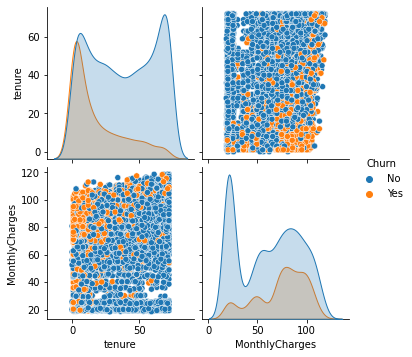

In [ ]:
 # pairplot plots pairwise relationships in the data
sns.pairplot(df[['Churn', 'tenure', 'MonthlyCharges']], hue="Churn")

**Interpreting the Pair plot:**
From the histogram plot, we can see that:
* Customers with higher MonthlyCharges have a lower rate of Churn
* Customers with higher tenure also have a lower rate of Churn



Now, lets explore categorical variables as they relate to Churn. 
From our dataset, we will be dividing our categorical varibales into three types; 
* billing features
* demographic features and 
* service features


In [ ]:
#billing features
billing_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

#demographic features
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

#service features
service_features = ['InternetService', 'PhoneService', 'MultipleLines', 'OnlineSecurity','OnlineBackup' , 
 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']

In [ ]:
#this function will help us plot our features to the Churn
def plot_categoricals(columns, title):
  fig, axs = plt.subplots(ncols=2, nrows=int(len(columns) / 2) + len(columns) % 2)
  fig.set_size_inches(15, 15)

  row = col = 0
  for column in columns:
    plot_title = '{}: {}'.format(title, column)
    sns.countplot(x=column, hue="Churn", data=df, ax=axs[row][col]).set_title(plot_title)

    if col == 1:
      col = 0
      row += 1
    else:
      col += 1

  # this prevents plots from overlapping
  plt.tight_layout()

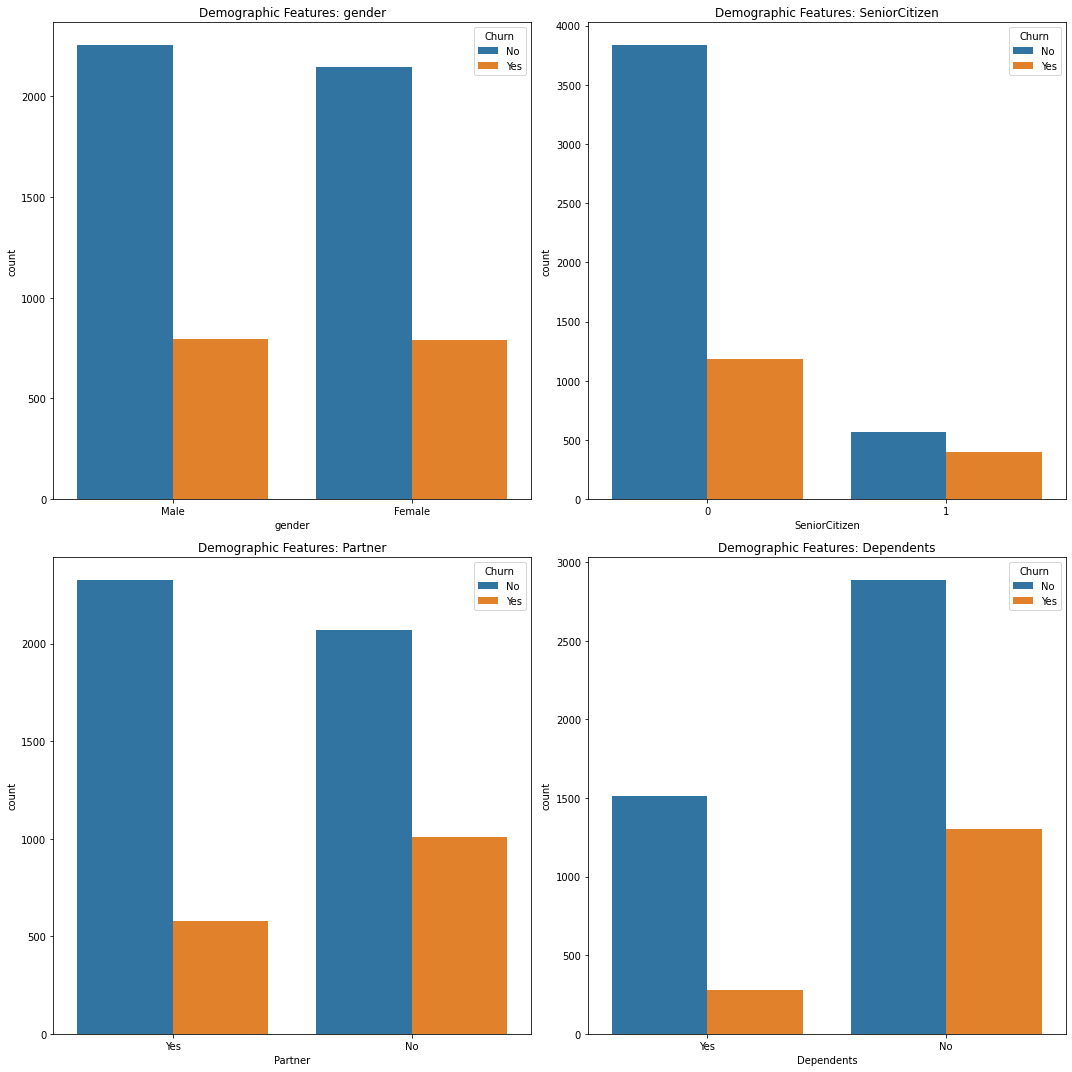

In [ ]:
plot_categoricals(demographic_features, 'Demographic Features')

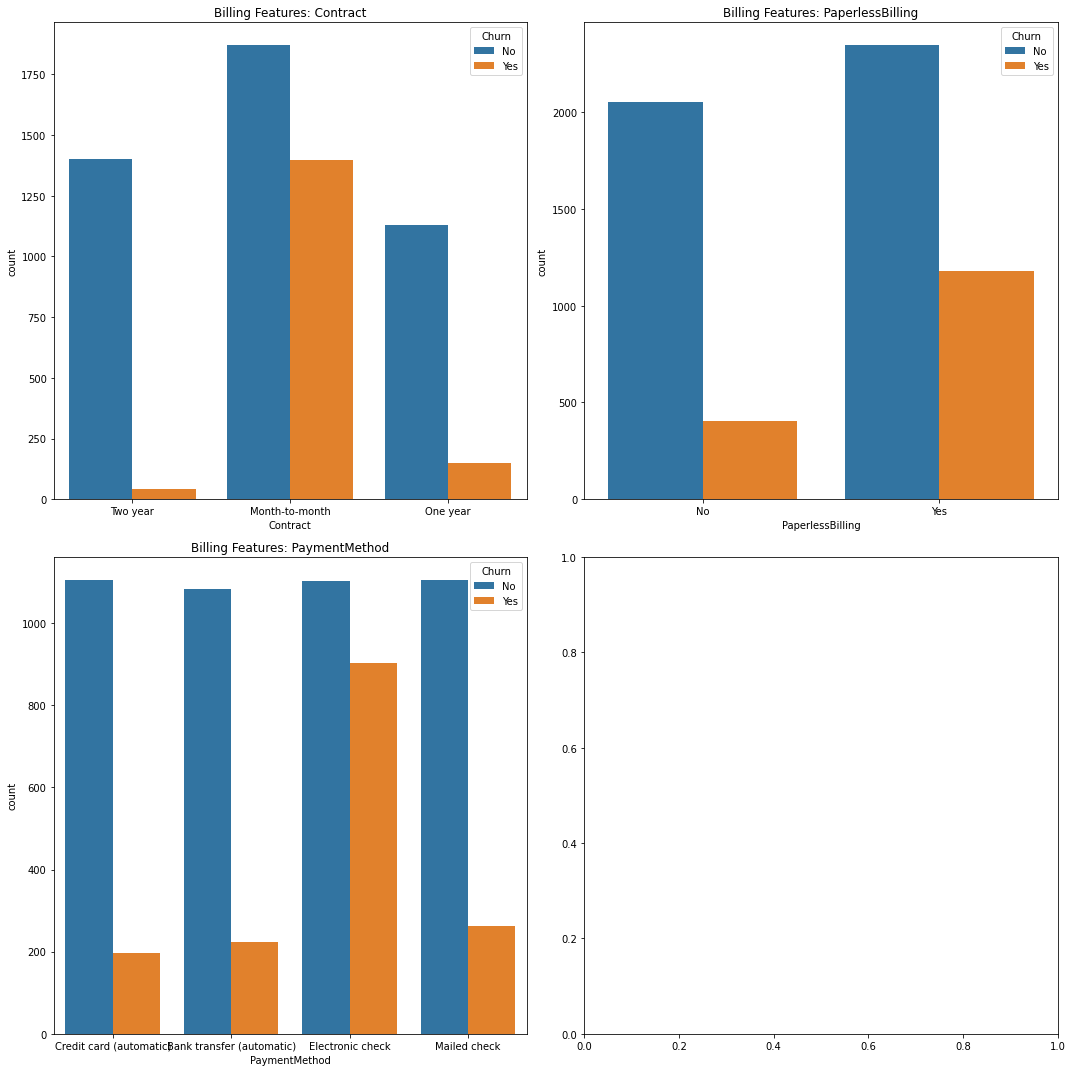

In [ ]:
plot_categoricals(billing_features, 'Billing Features')

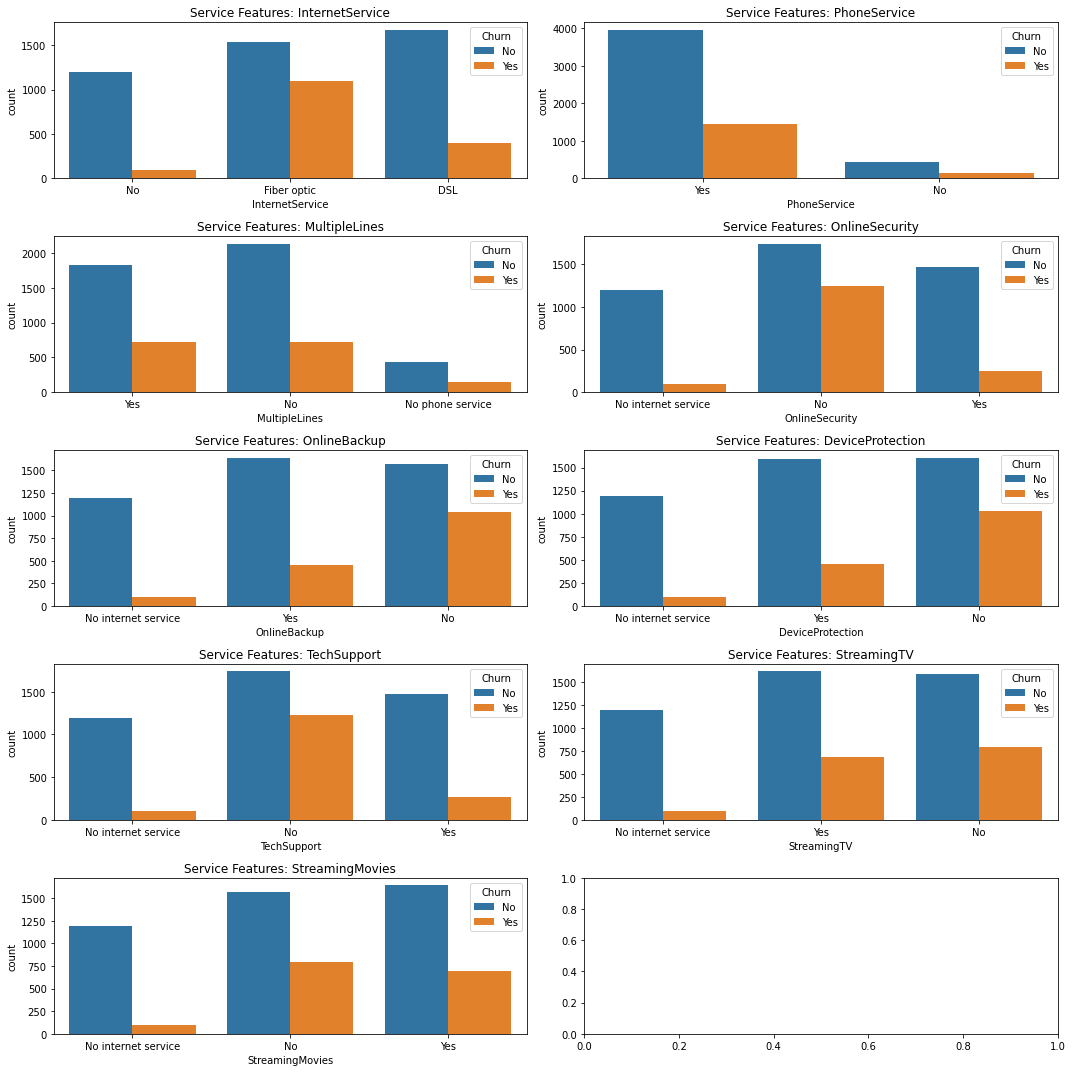

In [ ]:
plot_categoricals(service_features, 'Service Features')

**From this comparison, we can tell that;**

**Demographic features**
* Male and female customers have manginally even Churn/no Churn rate
* Senior citizens have a smaller ratio of Churn/no Churn while non senior citizens have a large ratio of no Churn to Churn

**Billing features**
* Month-to-month contracts have a higher churn rate than any other billing contract
* Customers on two year billing contracts have an extremely low Churn rate. 
* Payment method by electronic checks have a manginally high churn rate than any other payment method
* All other payment methods have low Churn rate

**Service features**
* Customers on fiber optics have a higher churn rate than other internet services
* Customers with no online security, no online backup, no device protection, no tech support have higher churn rate than others in their group. 


##### Dealing with categorical variables through label encoding

In [ ]:
#Extracting categorial featuers using boolean mask.
categorical_feature_mask = df.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0


####plotting a correlation matrix

Now, lets build a correlation matrx. A correlation matrix will help us visualize the interaction between each column in our dataframe. To identify proper interaction, we need to convert our categorical variables to numeric variables because a correlation matrix doesn't recognize non-numeric variables.

In [ ]:
corr = df.corr()

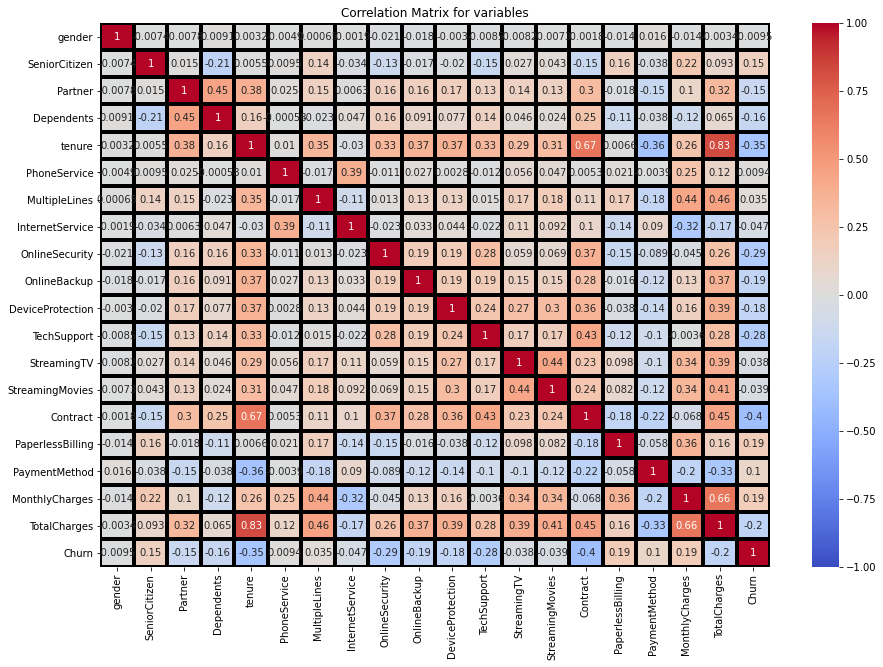

In [ ]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.title("Correlation Matrix for variables")
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

Selecting features relevant to our Churn target feature.

In [ ]:
corr['Churn'].sort_values()

Contract           -0.396446
tenure             -0.348469
OnlineSecurity     -0.290306
TechSupport        -0.277261
TotalCharges       -0.197632
OnlineBackup       -0.193851
DeviceProtection   -0.180120
Dependents         -0.160204
Partner            -0.146840
InternetService    -0.047198
StreamingMovies    -0.039100
StreamingTV        -0.037609
gender             -0.009548
PhoneService        0.009421
MultipleLines       0.034943
PaymentMethod       0.103927
SeniorCitizen       0.150097
MonthlyCharges      0.186753
PaperlessBilling    0.188996
Churn               1.000000
Name: Churn, dtype: float64

In [ ]:
corr[abs(corr['Churn']) > 0.1].index

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

**Interpreting the correlation matrix**
* The red color in our matrix represents a positive correlation, and the blue color represents a negative correlation 
* Looking through our matrix, we can see that tenure has a strong correlation to totalcharges.
* Contract has a strong correlation to tenure
* Monthly charge has a strong correlation to total charges
* The three variables most correlated with churn are paperless billing, MonthlyCharges and SeniorCitizen.
* The highest postive correlation is between tenure and total charges
* The highest negative correlation is between tenure and payment method. 


In [ ]:
#creating a new dataframe with the selected features. 
df_new = df[['SeniorCitizen', 'Partner', 'Dependents',  'OnlineSecurity','OnlineBackup',
             'DeviceProtection', 'TechSupport', 'Contract','PaperlessBilling', 'PaymentMethod', 'tenure', 'MonthlyCharges', 'Churn']]

In [ ]:
df_new.head()

,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,Churn
0,0,1,1,1,1,1,1,2,0,1,72,24.10,0
1,0,0,0,0,2,2,0,0,1,1,44,88.15,0
2,1,1,0,0,0,0,0,0,1,0,38,74.95,1
3,0,0,0,0,0,0,0,0,1,2,4,55.90,0
4,0,0,0,2,0,2,0,0,0,2,2,53.45,0


In [ ]:
df_new.shape

(5986, 13)

#### Lets check for outliers in our dataset

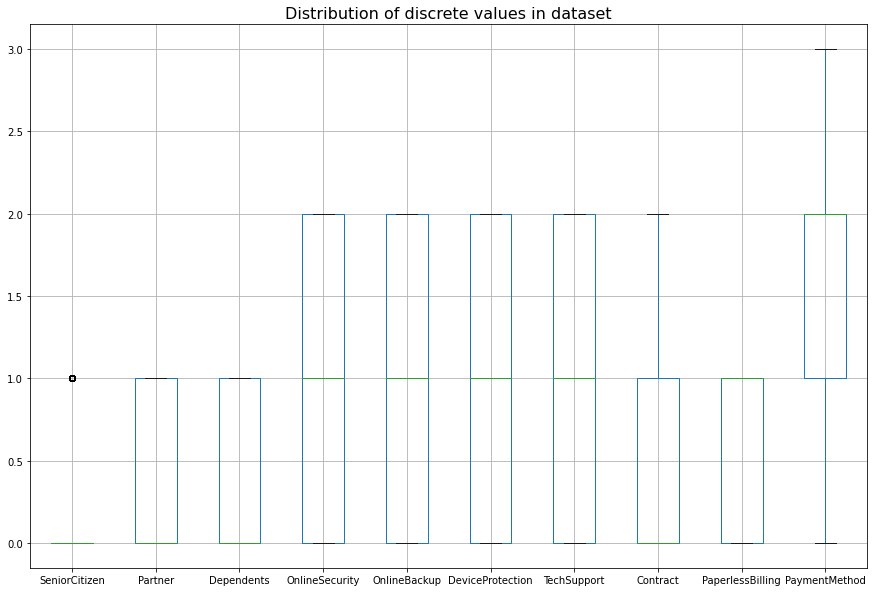

In [ ]:
#boxplot for discrete values
boxplot = df_new.boxplot(column=['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
                                 'PaperlessBilling', 'PaymentMethod'], grid=True)
boxplot.axes.set_title("Distribution of discrete values in dataset", fontsize=16)
boxplot.plot()
plt.show()

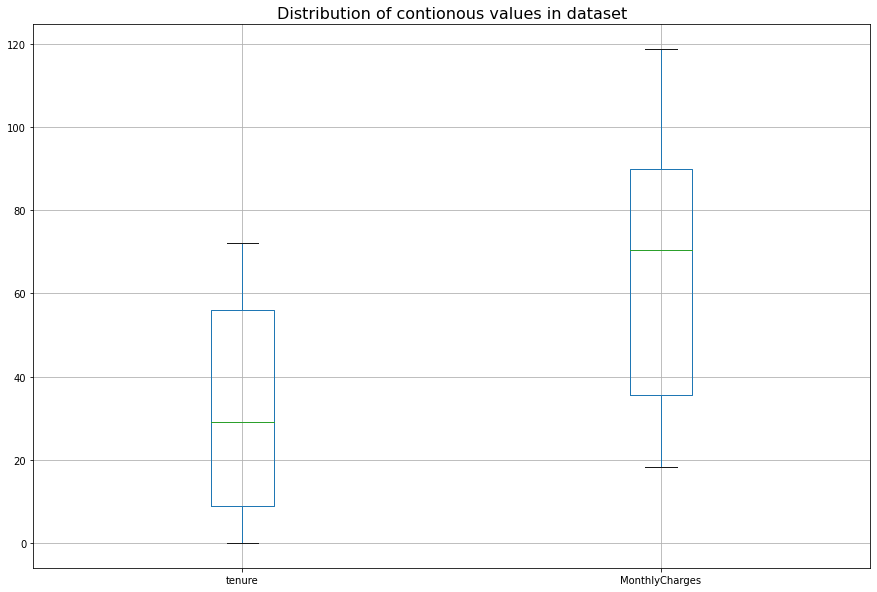

In [ ]:
#boxplot for contionous values
boxplot = df_new.boxplot(column=['tenure', 'MonthlyCharges'], grid=True)
boxplot.axes.set_title("Distribution of contionous values in dataset", fontsize=16)
boxplot.plot()
plt.show()

There are no outliers in our dataset. This is good. We can now go on to building our machine learning model. 

## 4. Building our Machine learning models

We are going to be splitting our data into 70% train set and 25% testset. That said, in building our model, we are going to be doing a cross validation on our trainset.

In [ ]:
!pip install joblib

In [ ]:
#resampling
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


#Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Models
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from imblearn.under_sampling import RandomUnderSampler

from sklearn.externals import joblib

### Dealing with imbalance in our feature set

We are going to be dealing with the imbalance in our feature variable through oversampling. We are using resampling because our dataset isn't a lot. We will be creating additional data for our 'Yes' Churn class by upsampling. 

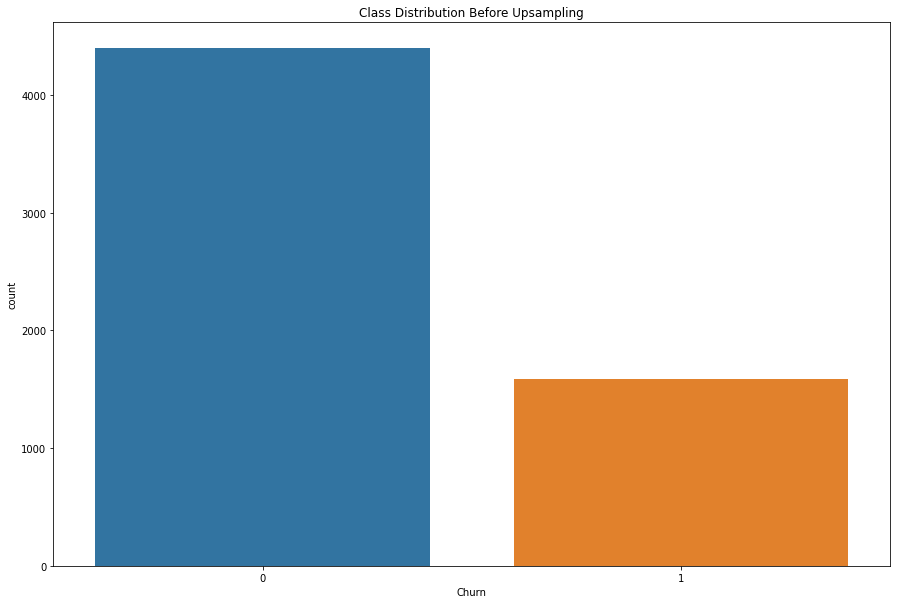

In [ ]:
sns.countplot('Churn', data=df_new)
plt.title('Class Distribution Before Upsampling')
plt.show()

In [ ]:
# Separate input features and target
y = df_new.Churn
X = df_new.drop('Churn', axis=1)

In [ ]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [ ]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((4489, 12), (1497, 12), (4489,), (1497,))

In [ ]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

In [ ]:
X.shape

(4489, 13)

In [ ]:
# Separate majority and minority classes
no_Churn = X[X.Churn == 0]
yes_Churn = X[X.Churn == 1]

In [ ]:
# upsample minority
yes_Churn_upsampled = resample(yes_Churn,
                          replace=True, # sample with replacement
                          n_samples=len(no_Churn), # match number in majority class
                          random_state=27) # reproducible results

In [ ]:
# combine majority and upsampled minority
upsampled = pd.concat([no_Churn, yes_Churn_upsampled])

In [ ]:
# check new class counts
upsampled.Churn.value_counts()
 

1    3296
0    3296
Name: Churn, dtype: int64

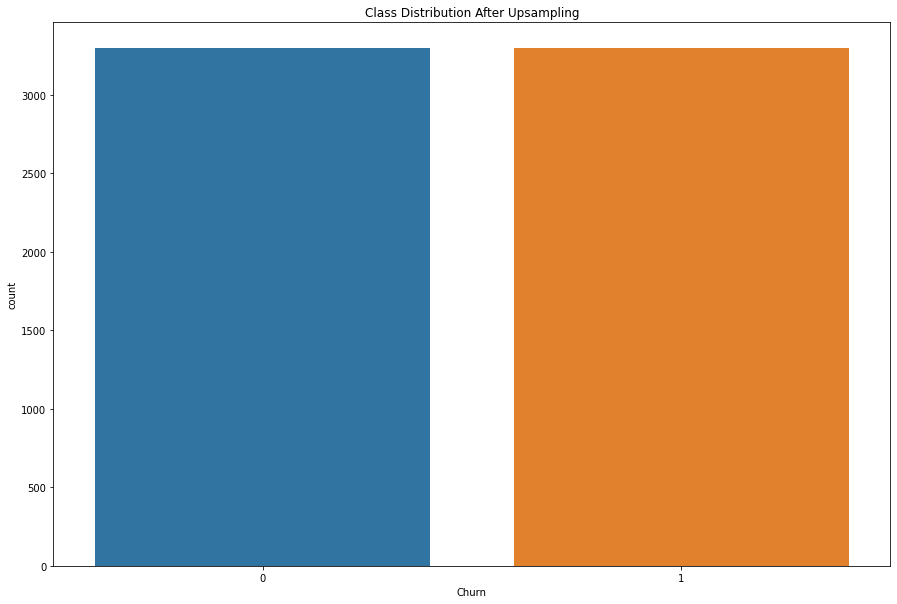

In [ ]:
sns.countplot('Churn', data=upsampled)
plt.title('Class Distribution After Upsampling')
plt.show()

In [ ]:
upsampled.head()

,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,Churn
912,0,1,1,2,0,2,0,1,0,1,33,74.75,0
4855,0,0,0,1,1,1,1,1,0,2,4,23.90,0
4748,0,0,0,0,0,0,2,0,1,2,29,31.20,0
4496,0,0,0,1,1,1,1,0,0,1,10,19.75,0
4319,1,1,0,0,2,0,0,0,0,2,60,89.45,0


In [ ]:
upsampled.shape

(6592, 13)

### Building our maching learning model

**We will be testing out the following models to determin the one with the best accuracy in prediction:**
* SVC (Support Vector Classifier)
* Logistic Regression
* Random forest 

 **Things to know:**


---
**Hyperparameters tuning:**
We will use grid search to picks out a grid of hyperparameter values, evaluates every one of them, and returns the best one.

**Feature selection:**
Although we picked out features closely related to our target feature already, we will still build models with PCA to select the best features and ensure features are independet from one another.

**Evaluation:** 
To evaluate the effectiveness of these models, we will use recall.

As the goal is to identify the maximum numbers of customers that might churn, recall which determines the portion of real postives that are correctly identified is well suited.

Simply put, it is better to have a smaller number of false negatives. 


In [ ]:
#seperating the feature and target set again 
X_train = upsampled.drop(['Churn'], axis=1) #feature
y_train = upsampled['Churn']#target


In [ ]:
X_train.shape

(6592, 12)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
sc = StandardScaler()

In [ ]:
# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
                        ('pca', PCA(n_components=2)),
                        ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=42))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
                        ('pca', PCA(n_components=2)),
                        ('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('clf', svm.SVC(random_state=42))])

pipe_svm_pca = Pipeline([('scl', StandardScaler()),
                         ('pca', PCA(n_components=2)),
                         ('clf', svm.SVC(random_state=42))])

In [ ]:
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_fl,
                   'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
                    'clf__C': param_range}]


In [ ]:
# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
                     param_grid=grid_params_lr,
                     scoring = 'accuracy',
                     cv=10) 

gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
                         param_grid=grid_params_lr,
                         scoring = 'accuracy',
                         cv=10)

gs_rf = GridSearchCV(estimator=pipe_rf,
                     param_grid=grid_params_rf,
                     scoring = 'accuracy',
                     cv=10, 
                     n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
                         param_grid=grid_params_rf,
                         scoring = 'accuracy', 
                         cv=10, 
                         n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=grid_params_svm,
                      scoring = 'accuracy', 
                      cv=10,
                      n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
                          param_grid=grid_params_svm,
                          scoring = 'accuracy',
                          cv=10,
                          n_jobs=jobs)

In [ ]:
# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca]

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA',
             2: 'Random Forest', 3: 'Random Forest w/PCA',
             4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA'}

In [ ]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''

Performing model optimizations...



Estimator: Logistic Regression
Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.755
Test set accuracy score for best params: 0.741 
Test set precision score for best params: 0.510 
Test set recall score for best params: 0.790 
Test set f1_score for best params: 0.620 
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1103
           1       0.51      0.79      0.62       394

    accuracy                           0.74      1497
   macro avg       0.71      0.76      0.71      1497
weighted avg       0.80      0.74      0.76      1497



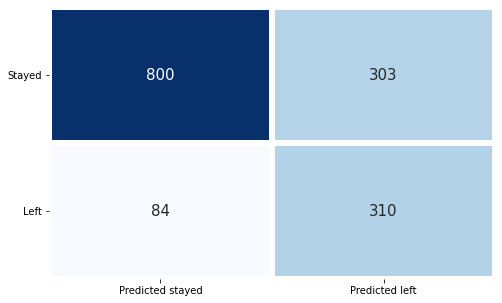

____________________________________________________________________________________________

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.740
Test set accuracy score for best params: 0.731 
Test set precision score for best params: 0.490 
Test set recall score for best params: 0.780 
Test set f1_score for best params: 0.600 
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1103
           1       0.49      0.78      0.60       394

    accuracy                           0.73      1497
   macro avg       0.70      0.75      0.70      1497
weighted avg       0.79      0.73      0.75      1497



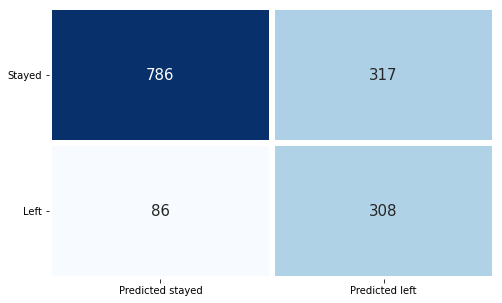

____________________________________________________________________________________________

Estimator: Random Forest


In [ ]:
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Metrics
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Test data precision of model with best params
    print('Test set precision score for best params: %.3f '% round(precision_score(y_test, y_pred), 2))
    # Test data recall of model with best params    
    print('Test set recall score for best params: %.3f '% round(recall_score(y_test, y_pred), 2))
    # Test data f1_score of model with best params    
    print('Test set f1_score for best params: %.3f '% round(f1_score(y_test, y_pred), 2))
    #confusion matrix
    gs_cm = confusion_matrix(y_test, y_pred)
    #classification report
    print(classification_report(y_test, y_pred))
    # Visualize confusion matrix
    plt.figure(figsize = (8, 5))
    sns.heatmap(gs_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
              yticklabels = ['Stayed', 'Left'], xticklabels = ['Predicted stayed', 'Predicted left'])
    plt.yticks(rotation = 0)
    plt.show()
    print('____________________________________________________________________________________________')
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


In [ ]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

In [ ]:
# Save best grid search pipeline to file
dump_file = 'best_gs_pipeline.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))


Saved Random Forest grid search pipeline to file: best_gs_pipeline.pkl


In [ ]:
print(best_gs)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                

The best model is the Random forest classifier with an accuracy score of 76% when fit on test set. 
However, logsitic regressor and SVM with PCA have are the models with the best recall. 


### Conclusion

The purpose of the first part of this project was to develop a model that would effectively determine churnning customers from the telecoms company. 

After testing out three different models both with and without PCA, we can suggest the use of the Random Forest model for Churn prediction. 

We believe that this model will help the telecoms company identify customers with the potential to churn in advance, in other to develop stategies to prevent customers from churning. 